In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2
import ROOT
import numpy as np

Welcome to JupyROOT 6.22/06


In [2]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.035)
gStyle.SetTitleYOffset(1.2)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

biglatex=TLatex()
biglatex.SetTextSize(0.045)

smalllatex=TLatex()
smalllatex.SetTextSize(0.022)

Create an RDataFrame by importing the root files from the analysis

In [3]:
ROOT.EnableImplicitMT()
d = RDataFrame("tree_postprocess", {"../../../data/fall2018-torus-1-v1-nSidis/may26_*.root",
                                    "../../../data/fall2018-torus+1-v1-nSidis/may26_*.root",
                                    "../../../data/spring2019-torus-1-v1-nSidis/may26_*.root"})

Define cuts

In [7]:
beta_cut = "abs(beta1-1)< 0.02 && abs(beta2-1) < 0.02"

Load up Mdiphoton histogram

In [8]:
h = d.Filter(beta_cut).Histo1D(("h",";M_{h} [GeV];Counts",1000,0,2.5),"Mdihadron")
hsig = d.Filter(beta_cut + " && Mdiphoton > 0.108 && Mdiphoton < 0.16").Histo1D(("hsig",";M_{h} [GeV];Counts",1000,0,2.5),"Mdihadron")
hbg = d.Filter(beta_cut + " && Mdiphoton > 0.17 && Mdiphoton < 0.4").Histo1D(("hbg",";M_{h} [GeV];Counts",1000,0,2.5),"Mdihadron")
helse = d.Filter(beta_cut + " && (Mdiphoton < 0.108 || Mdiphoton > 0.4)").Histo1D(("helse",";M_{h} [GeV];Counts",1000,0,2.5),"Mdihadron")

Plot histogram

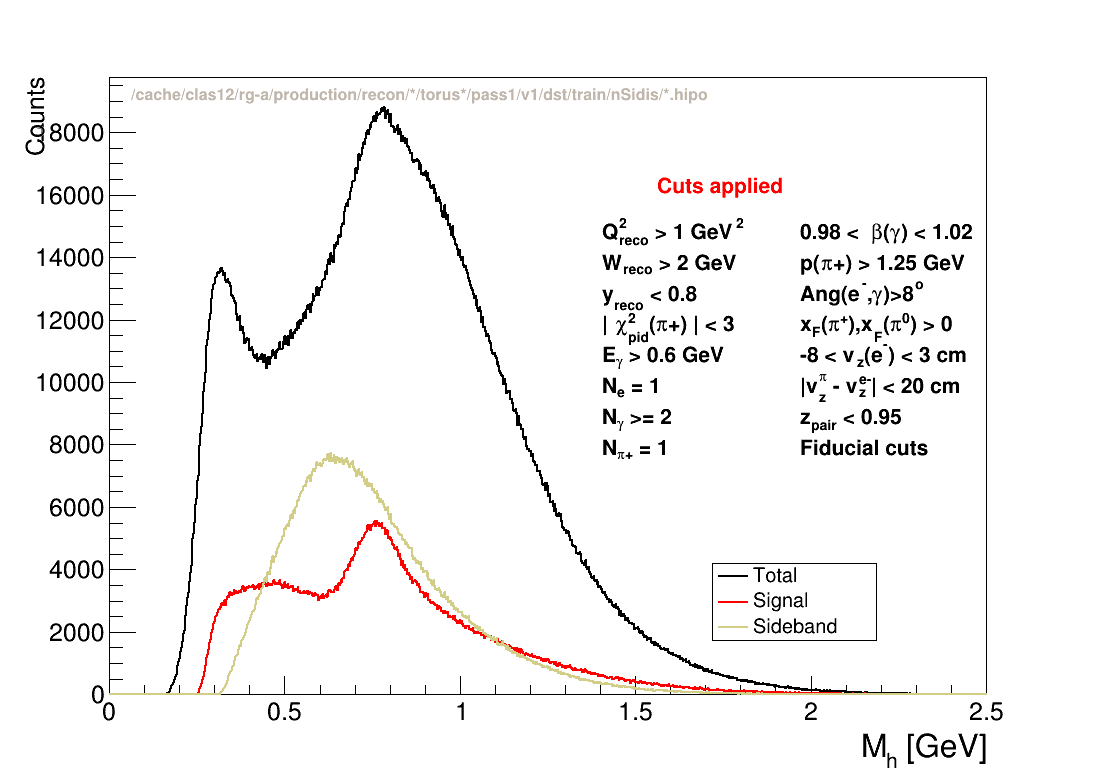

In [11]:
c = TCanvas("c","c",1100,800)
h.SetLineColor(1)
hsig.SetLineColor(2)
hbg.SetLineColor(41)
h.Draw("hist")
hsig.Draw("hist same")
hbg.Draw("hist same")
smalllatex.DrawLatexNDC(.12,.87,"#color[11]{/cache/clas12/rg-a/production/recon/*/torus*/pass1/v1/dst/train/nSidis/*.hipo}")
#latex.DrawLatexNDC(.54,.8,"#it{CLAS}12 10.6 GeV Analysis")
latex.DrawLatexNDC(.6,.75,"#color[2]{Cuts applied}")
latex.DrawLatexNDC(.55,.69,"Q^{2}_{reco} > 1 GeV^{2}")
latex.DrawLatexNDC(.55,.65,"W_{reco} > 2 GeV")
latex.DrawLatexNDC(.55,.61,"y_{reco} < 0.8 ")
latex.DrawLatexNDC(.55,.57,"| #chi^{2}_{pid}(#pi+) | < 3 ")
latex.DrawLatexNDC(.55,.53,"E_{#gamma} > 0.6 GeV")
latex.DrawLatexNDC(.55,.49,"N_{e} = 1 ")
latex.DrawLatexNDC(.55,.45,"N_{#gamma} >= 2 ")
latex.DrawLatexNDC(.55,.41,"N_{#pi+} = 1 ")
latex.DrawLatexNDC(0.73,0.69,"0.98 < #beta(#gamma) < 1.02")
latex.DrawLatexNDC(0.73,0.65,"p(#pi+) > 1.25 GeV")
latex.DrawLatexNDC(0.73,0.61,"Ang(e^{-},#gamma)>8^{o}")
latex.DrawLatexNDC(0.73,0.57,"x_{F}(#pi^{+}),x_{F}(#pi^{0}) > 0")
latex.DrawLatexNDC(0.73,0.53,"-8 < v_{z}(e^{-}) < 3 cm")
latex.DrawLatexNDC(0.73,0.49,"|v_{z}^{#pi} - v_{z}^{e-}| < 20 cm")
latex.DrawLatexNDC(0.73,0.45,"z_{pair} < 0.95")
latex.DrawLatexNDC(0.73,0.41,"Fiducial cuts")

legend=TLegend(0.65,0.17,0.8,0.27)
legend.AddEntry(h.GetValue(),"Total","l")
legend.AddEntry(hsig.GetValue(),"Signal","l")
legend.AddEntry(hbg.GetValue(),"Sideband","l")
legend.Draw("same")
c.Draw()

In [17]:
h.Integral(h.FindBin(0.108),h.FindBin(0.160))

690368.0

In [132]:
f = TF1("f","crystalball(0)+pol4(5)",0.07,0.5)
f.SetParameters(10000,0.131,0.01,1,1,1,100,1)
f.SetParLimits(1,0.129,0.133)
f.SetParLimits(3,0,1000)
f.SetParLimits(4,0,1000)
f.SetParLimits(5,0,100000)

In [117]:
  1  p0           2.79953e+04   5.65620e+01  -0.00000e+00   7.73197e-05
   2  p1           1.32591e-01   1.95250e-05  -0.00000e+00  -3.57688e+00
   3  p2           1.05857e-02   1.90462e-05   0.00000e+00   1.28040e+03
   4  p3           1.08231e+01   2.58722e-02  -0.00000e+00   3.99554e+02
   5  p4           2.45278e+01   7.07075e-01  -0.00000e+00   0.00000e+00
   6  p5           2.17977e+03   2.47847e+01   0.00000e+00   3.46337e+02
   7  p6           1.91216e+04   2.66372e+02  -0.00000e+00   2.32039e-03
   8  p7          -1.13092e+04   4.57292e+02   0.00000e+00   3.89086e-05
   9  p8          -7.26600e+04   1.38360e+03   0.00000e+00   1.92876e-04
  10  p9           7.04571e+04   3.05262e+03  -0.00000e+00   2.50924e-05

SyntaxError: invalid syntax (<ipython-input-117-c1cf9d1b91fa>, line 1)

 FCN=1134.63 FROM MIGRAD    STATUS=CONVERGED     156 CALLS         157 TOTAL
                     EDM=1.56555e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.87619e+04   5.93958e+01   1.01933e+00  -3.55886e-07
   2  p1           1.32883e-01   2.15053e-05   6.53437e-04   1.82566e-03
   3  p2           1.02963e-02   2.26031e-05   3.10435e-07  -3.93411e+00
   4  p3           1.26004e+00   1.03880e-02   4.29850e-06  -3.58622e-02
   5  p4           1.00000e+03   9.26314e+02   9.13825e-02** at limit **
   6  p5           2.50165e+03   4.07630e+01   6.22936e-06  -6.66500e-01
   7  p6           2.84304e+03   5.31159e+02   3.03985e-01  -1.61520e-05
   8  p7           1.19535e+05   2.64892e+03   7.69707e-01  -5.83099e-06
   9  p8          -4.36116e+05   6.52819e+03   1.80106e+00  -2.18490e-06
  10  p9           4.01333e+05   6.41772e+

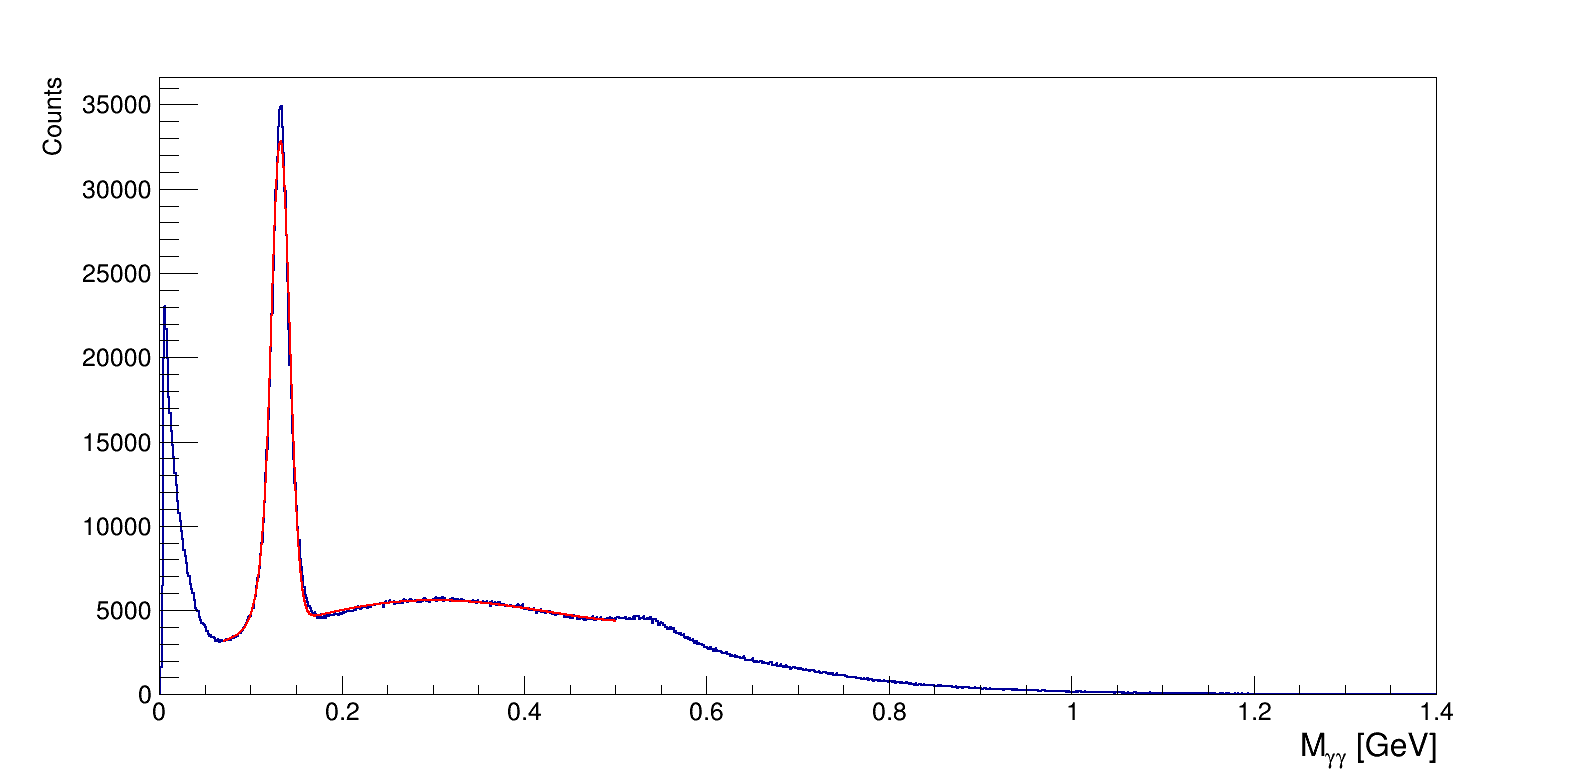

In [137]:
c = TCanvas("c","c",1600,800)
f.SetNpx(10000)
h.Fit(f,"LSR")
f.Draw("same")
h.GetXaxis().SetRangeUser(0,1.4)
c.Draw()

In [138]:
f.GetChisquare()/f.GetNDF()

7.541957003056615